In [113]:
import matplotlib.pyplot as plt
import numpy as np

LR_imgs = []
HR_imgs = []
LR_patch = []
HR_patch = []
Img_cnt = 2
resolution_ratio = 8
patch_size = 32

def print_image(img):
    imgplot = plt.imshow(img)
    plt.show()

for i in range(1,Img_cnt+1):
    s=str(i)
    while len(s)<4:
        s="0"+s
    LR_imgs.append(np.array(plt.imread("/home/ishan/Desktop/BTP/DIV2K_train_LR_x8/"+s+"x8.png")))
    HR_imgs.append(np.array(plt.imread("/home/ishan/Desktop/BTP/DIV2K_train_HR/"+s+".png")))

# print_image(HR_imgs[0])

for i in range(0,Img_cnt):
    x,y,z = LR_imgs[i].shape
    a1 = x//patch_size
    a2 = y//patch_size
    for i1 in range(0,a1):
        for i2 in range(0,a2):
            temp = [[[0.0]*3]*patch_size]*patch_size
            temp = np.array(temp)
            for j1 in range(i1*patch_size,(i1+1)*patch_size):
                for j2 in range(i2*patch_size,(i2+1)*patch_size):
                    temp[j1-i1*patch_size][j2-i2*patch_size]=LR_imgs[i][j1][j2]
            LR_patch.append(temp)
            
patch_size = patch_size*resolution_ratio

for i in range(0,Img_cnt):
    x,y,z = HR_imgs[i].shape
    a1 = x//patch_size
    a2 = y//patch_size
    for i1 in range(0,a1):
        for i2 in range(0,a2):
            temp = [[[0.0]*3]*patch_size]*patch_size
            temp = np.array(temp)
            for j1 in range(i1*patch_size,(i1+1)*patch_size):
                for j2 in range(i2*patch_size,(i2+1)*patch_size):
                    temp[j1-i1*patch_size][j2-i2*patch_size]=HR_imgs[i][j1][j2]
            HR_patch.append(temp)


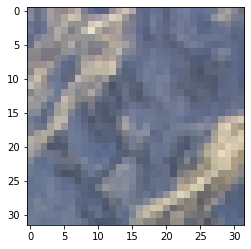

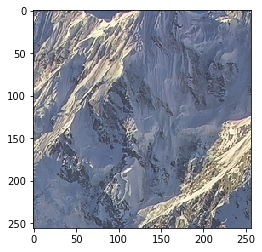

In [117]:
# print_image(LR_patch[46])
# print_image(HR_patch[46])

In [139]:
from keras.models import Model
from keras.layers import Concatenate, Add, Average, Input, Dense, Flatten, BatchNormalization, Activation, LeakyReLU
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, Convolution2DTranspose
from keras import backend as K
from keras.utils.np_utils import to_categorical
import keras.callbacks as callbacks
import keras.optimizers as optimizers
import keras

Using TensorFlow backend.


In [138]:
from math import log10, sqrt 
import numpy as np 
  
def PSNRLoss(y_true, y_pred):
    return -10. * K.log(K.mean(K.square(y_pred - y_true))) / K.log(10.)